# Sales Performance Analytics — Day 3
## Insight Generation & Final Report
**Internship Task | Data Science**

**Objective:** Extract 6 key business insights from calculated KPIs,
identify performance gaps, and provide actionable recommendations
for improving lead conversion, revenue growth, and sales efficiency.

In [1]:
# ─────────────────────────────────────────
# Import & Load
# ─────────────────────────────────────────

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.rcParams.update({
    'figure.dpi'       : 150,
    'axes.spines.top'  : False,
    'axes.spines.right': False,
    'font.family'      : 'DejaVu Sans',
    'axes.titlesize'   : 13,
    'axes.titleweight' : 'bold'
})

df = pd.read_csv('../data/cleaned/BD_KPI_Cleaned_Dataset.csv',
                 parse_dates=['Lead_Date', 'Conversion_Date'])

df['Lead_Month'] = df['Lead_Date'].dt.to_period('M')

print(f"Dataset loaded: {df.shape}")

Dataset loaded: (683, 13)



  Actual Conversion Rate : 39.82%
  Industry Benchmark     : 45–55% (B2B Sales Standard)
  Gap                    : 15.18% below upper benchmark

  Finding:
  Only 272 out of 683 leads converted into customers.
  This means 411 leads (60.18%) were lost — representing
  significant untapped revenue potential.

  If conversion rate improved to 50%:
  → Additional conversions : 69
  → Estimated extra revenue: $1,710,510.00
    (at avg revenue per client of $24,790.74)



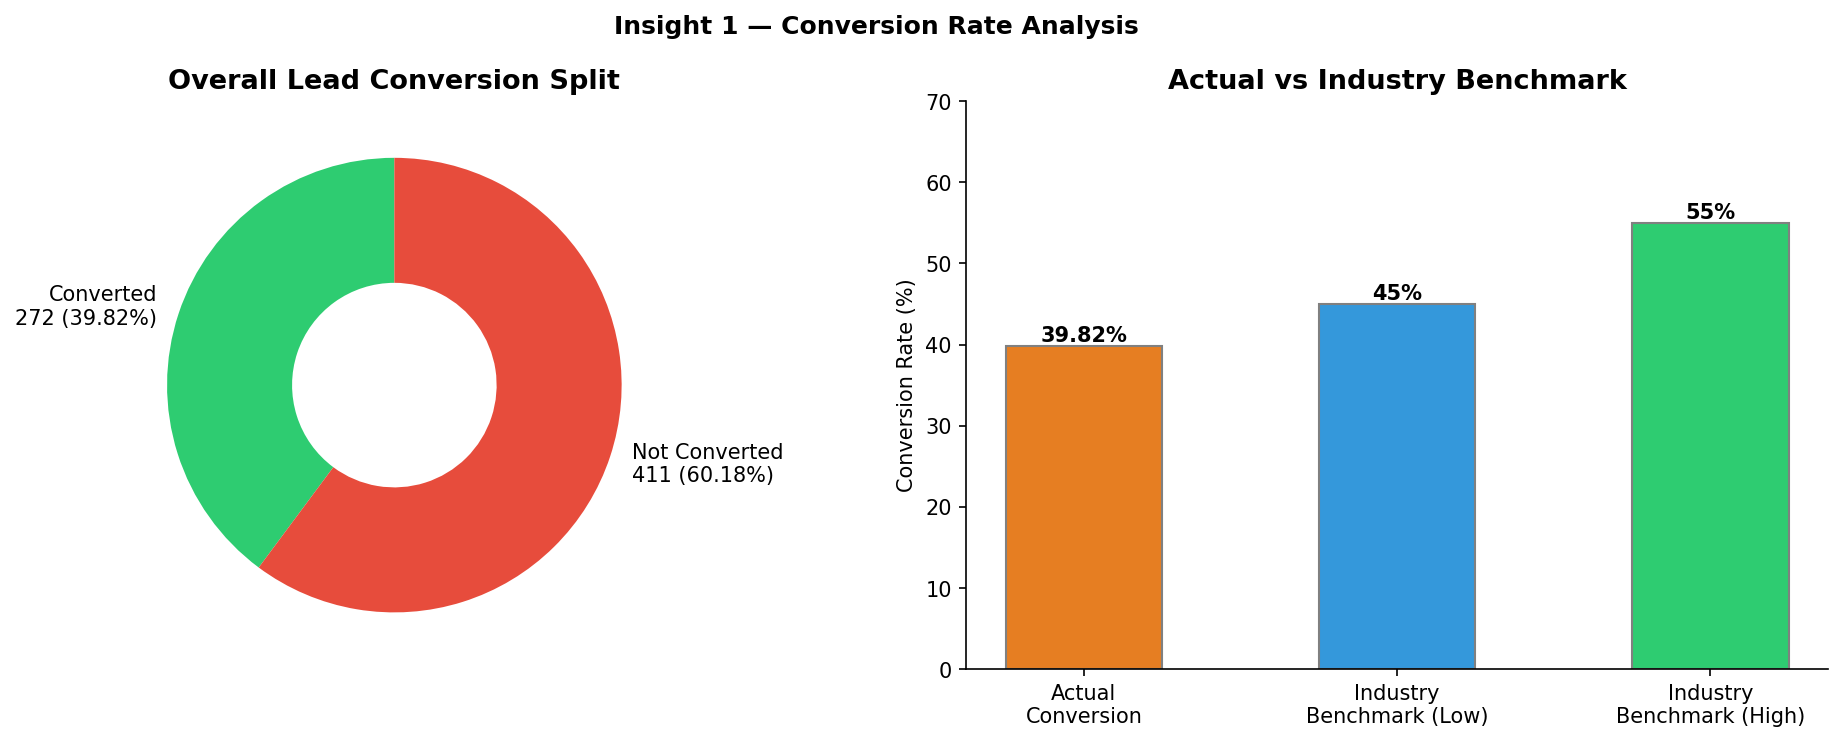

Insight 1 chart saved


In [3]:
# ─────────────────────────────────────────
# INSIGHT 1 — Conversion Rate Performance
# ─────────────────────────────────────────

total_leads     = 683
converted       = 272
not_converted   = 411
conv_rate       = 39.82

print(f"""
  Actual Conversion Rate : {conv_rate}%
  Industry Benchmark     : 45–55% (B2B Sales Standard)
  Gap                    : {55 - conv_rate:.2f}% below upper benchmark

  Finding:
  Only 272 out of 683 leads converted into customers.
  This means 411 leads (60.18%) were lost — representing
  significant untapped revenue potential.

  If conversion rate improved to 50%:
  → Additional conversions : {int(683 * 0.50) - converted}
  → Estimated extra revenue: ${(int(683 * 0.50) - converted) * 24790:,.2f}
    (at avg revenue per client of $24,790.74)
""")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Insight 1 — Conversion Rate Analysis', fontweight='bold')

# Donut
sizes  = [converted, not_converted]
labels = ['Converted\n272 (39.82%)', 'Not Converted\n411 (60.18%)']
colors = ['#2ecc71', '#e74c3c']
axes[0].pie(sizes, labels=labels, colors=colors,
            autopct='', startangle=90,
            wedgeprops=dict(width=0.55))
axes[0].set_title('Overall Lead Conversion Split')

# Benchmark comparison
categories  = ['Actual\nConversion', 'Industry\nBenchmark (Low)',
                'Industry\nBenchmark (High)']
values      = [conv_rate, 45, 55]
bar_colors  = ['#e67e22', '#3498db', '#2ecc71']
bars = axes[1].bar(categories, values, color=bar_colors,
                   edgecolor='gray', width=0.5)
axes[1].set_ylabel('Conversion Rate (%)')
axes[1].set_title('Actual vs Industry Benchmark')
axes[1].set_ylim(0, 70)
for bar, val in zip(bars, values):
    axes[1].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 0.5,
                 f'{val}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/Insight1_Conversion_Rate.png', bbox_inches='tight')
plt.show()
print("Insight 1 chart saved")

  INSIGHT 2: WEBSITE & SOCIAL MEDIA ARE TOP PERFORMERS

  Best Source  → Website
    Conversion Rate : 47.96%  (highest)
    CAC             : $5,438.45 (lowest — most cost efficient)
    ROI             : 341.02%  (highest return)

  Worst Source → Email Campaign
    Conversion Rate : 33.12%  (2nd lowest among known sources)
    CAC             : $7,973.32 (2nd highest cost)
    ROI             : 217.77%

  Key Gap:
  Website converts 14.84 percentage points MORE than
  Email Campaign, yet Email Campaign has 154 leads
  (most leads) — meaning budget is being over-invested
  in a lower-performing channel.

  Recommendation:
  Shift 20–30% of Email Campaign budget towards
  Website and Social Media optimization.



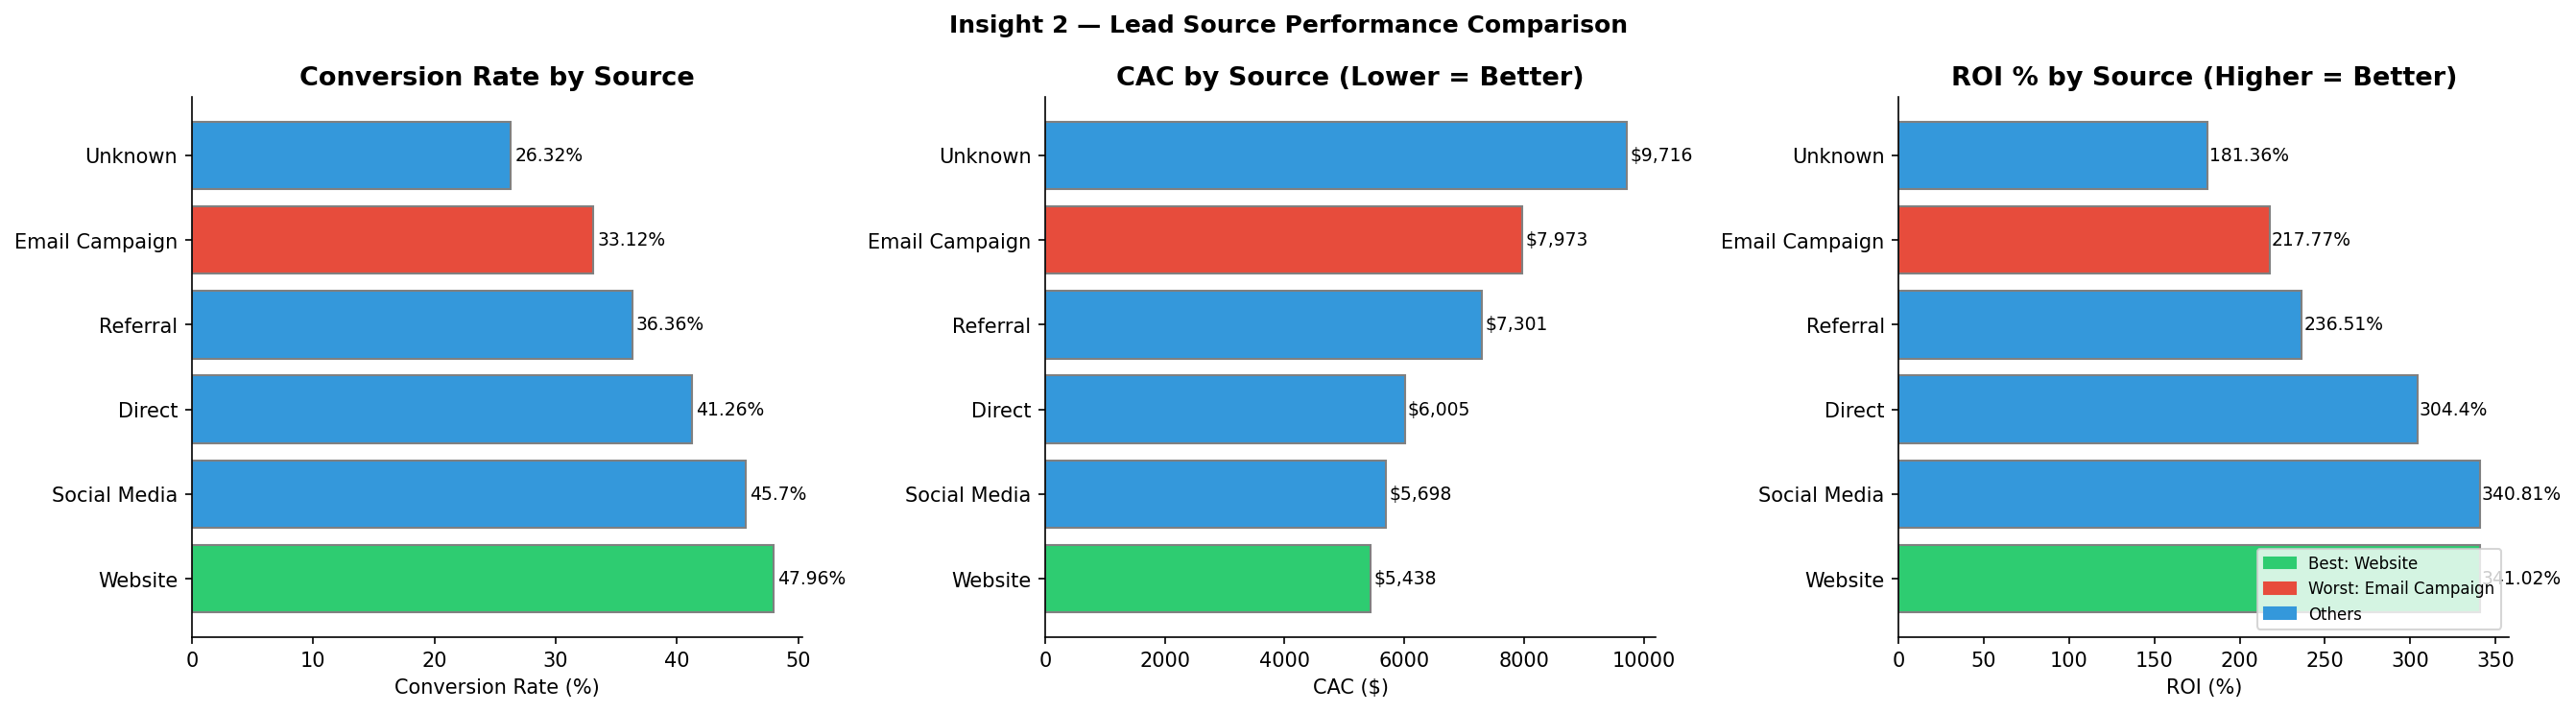

Insight 2 chart saved


In [4]:
# ─────────────────────────────────────────
# INSIGHT 2 — Lead Source Performance Gap
# ─────────────────────────────────────────

source_data = {
    'Lead_Source'       : ['Website','Social Media','Direct',
                           'Referral','Email Campaign','Unknown'],
    'Conversion_Rate_%' : [47.96, 45.70, 41.26, 36.36, 33.12, 26.32],
    'CAC'               : [5438.45, 5697.52, 6005.24,
                           7300.91, 7973.32, 9716.20],
    'ROI_%'             : [341.02, 340.81, 304.40,
                           236.51, 217.77, 181.36],
    'Total_Leads'       : [98, 151, 143, 99, 154, 38]
}
source_df = pd.DataFrame(source_data)

print("=" * 60)
print("  INSIGHT 2: WEBSITE & SOCIAL MEDIA ARE TOP PERFORMERS")
print("=" * 60)
print(f"""
  Best Source  → Website
    Conversion Rate : 47.96%  (highest)
    CAC             : $5,438.45 (lowest — most cost efficient)
    ROI             : 341.02%  (highest return)

  Worst Source → Email Campaign
    Conversion Rate : 33.12%  (2nd lowest among known sources)
    CAC             : $7,973.32 (2nd highest cost)
    ROI             : 217.77%

  Key Gap:
  Website converts 14.84 percentage points MORE than
  Email Campaign, yet Email Campaign has 154 leads
  (most leads) — meaning budget is being over-invested
  in a lower-performing channel.

  Recommendation:
  Shift 20–30% of Email Campaign budget towards
  Website and Social Media optimization.
""")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Insight 2 — Lead Source Performance Comparison',
             fontweight='bold')

colors = ['#2ecc71' if s == 'Website'
          else '#e74c3c' if s == 'Email Campaign'
          else '#3498db' for s in source_df['Lead_Source']]

# Chart 1: Conversion rate
axes[0].barh(source_df['Lead_Source'],
             source_df['Conversion_Rate_%'],
             color=colors, edgecolor='gray')
axes[0].set_xlabel('Conversion Rate (%)')
axes[0].set_title('Conversion Rate by Source')
for i, v in enumerate(source_df['Conversion_Rate_%']):
    axes[0].text(v + 0.3, i, f'{v}%', va='center', fontsize=9)

# Chart 2: CAC
axes[1].barh(source_df['Lead_Source'],
             source_df['CAC'], color=colors, edgecolor='gray')
axes[1].set_xlabel('CAC ($)')
axes[1].set_title('CAC by Source (Lower = Better)')
for i, v in enumerate(source_df['CAC']):
    axes[1].text(v + 50, i, f'${v:,.0f}', va='center', fontsize=9)

# Chart 3: ROI
axes[2].barh(source_df['Lead_Source'],
             source_df['ROI_%'], color=colors, edgecolor='gray')
axes[2].set_xlabel('ROI (%)')
axes[2].set_title('ROI % by Source (Higher = Better)')
for i, v in enumerate(source_df['ROI_%']):
    axes[2].text(v + 1, i, f'{v}%', va='center', fontsize=9)

green_patch = mpatches.Patch(color='#2ecc71', label='Best: Website')
red_patch   = mpatches.Patch(color='#e74c3c', label='Worst: Email Campaign')
blue_patch  = mpatches.Patch(color='#3498db', label='Others')
axes[2].legend(handles=[green_patch, red_patch, blue_patch],
               loc='lower right', fontsize=8)

plt.tight_layout()
plt.savefig('../reports/Insight2_Lead_Source_Performance.png',
            bbox_inches='tight')
plt.show()
print("Insight 2 chart saved")

  INSIGHT 3: CAC IS HIGH BUT ROI REMAINS POSITIVE

  Overall CAC             : $6,506.17
  Revenue per Client      : $24,790.74
  Revenue-to-CAC Ratio    : 3.8x
    → Every $1 spent on acquisition returns $3.8

  Overall ROI             : 281.0%

  Regional CAC Breakdown:
    North   : $5,576.93  ← Most efficient region
    South   : $6,358.75
    West    : $6,630.35
    Unknown : $7,150.54
    East    : $7,569.70  ← Least efficient region

  Key Finding:
  East region has a CAC that is $1,992.77 (35.7%) higher
  than the North region, yet both likely serve similar
  client profiles. This suggests inefficient spend
  allocation or lower lead quality in the East.

  Recommendation:
  Investigate East region sales process and marketing
  spend. Replicate North region strategies in East.



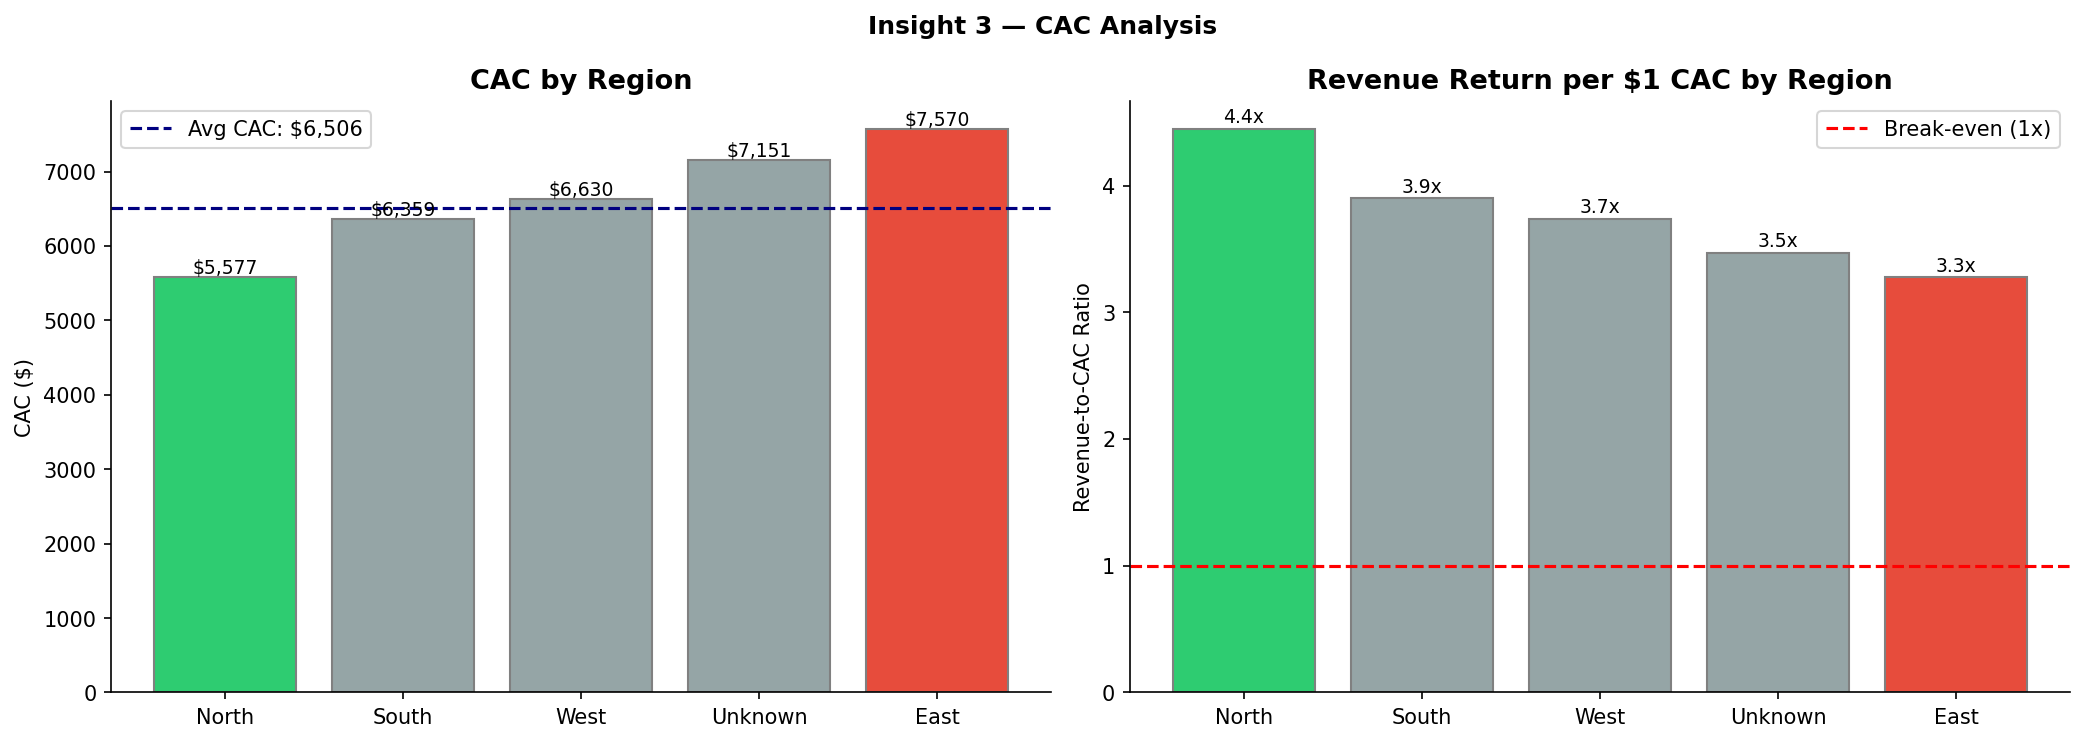

Insight 3 chart saved


In [5]:
# ─────────────────────────────────────────
# INSIGHT 3 — High CAC Is Hurting Profitability
# ─────────────────────────────────────────

overall_cac        = 6506.17
revenue_per_client = 24790.74
overall_roi        = (6743080.52 - 1769679.24) / 1769679.24 * 100

print("=" * 60)
print("  INSIGHT 3: CAC IS HIGH BUT ROI REMAINS POSITIVE")
print("=" * 60)
print(f"""
  Overall CAC             : $6,506.17
  Revenue per Client      : $24,790.74
  Revenue-to-CAC Ratio    : {revenue_per_client/overall_cac:.1f}x
    → Every $1 spent on acquisition returns ${revenue_per_client/overall_cac:.1f}

  Overall ROI             : {overall_roi:.1f}%

  Regional CAC Breakdown:
    North   : $5,576.93  ← Most efficient region
    South   : $6,358.75
    West    : $6,630.35
    Unknown : $7,150.54
    East    : $7,569.70  ← Least efficient region

  Key Finding:
  East region has a CAC that is $1,992.77 (35.7%) higher
  than the North region, yet both likely serve similar
  client profiles. This suggests inefficient spend
  allocation or lower lead quality in the East.

  Recommendation:
  Investigate East region sales process and marketing
  spend. Replicate North region strategies in East.
""")

# Visualization
regions   = ['North', 'South', 'West', 'Unknown', 'East']
cac_vals  = [5576.93, 6358.75, 6630.35, 7150.54, 7569.70]
reg_colors = ['#2ecc71' if r == 'North'
               else '#e74c3c' if r == 'East'
               else '#95a5a6' for r in regions]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Insight 3 — CAC Analysis', fontweight='bold')

bars = axes[0].bar(regions, cac_vals, color=reg_colors, edgecolor='gray')
axes[0].axhline(y=overall_cac, color='navy', linestyle='--',
                linewidth=1.5, label=f'Avg CAC: ${overall_cac:,.0f}')
axes[0].set_ylabel('CAC ($)')
axes[0].set_title('CAC by Region')
axes[0].legend()
for bar, val in zip(bars, cac_vals):
    axes[0].text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + 50,
                 f'${val:,.0f}', ha='center', fontsize=9)

# Revenue to CAC ratio
ratios       = [revenue_per_client / c for c in cac_vals]
axes[1].bar(regions, ratios, color=reg_colors, edgecolor='gray')
axes[1].axhline(y=1, color='red', linestyle='--',
                linewidth=1.5, label='Break-even (1x)')
axes[1].set_ylabel('Revenue-to-CAC Ratio')
axes[1].set_title('Revenue Return per $1 CAC by Region')
axes[1].legend()
for i, v in enumerate(ratios):
    axes[1].text(i, v + 0.05, f'{v:.1f}x', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/Insight3_CAC_Analysis.png', bbox_inches='tight')
plt.show()
print("Insight 3 chart saved")

  INSIGHT 4: FRANK MILLER LEADS REVENUE BUT CAROL WHITE
             CLOSES DEALS FASTEST

  Revenue per Client:
    Top    : Frank Miller   → $28,896.16 per client
    Bottom : Unassigned     → $20,681.33 per client
    Gap    : $8,214.83 difference

  Sales Cycle Speed:
    Fastest : Carol White   → 58.2 days avg
    Slowest : Frank Miller  → 75.0 days avg
    Gap     : 16.8 days difference

  Key Tension:
  Frank Miller generates the highest revenue per client
  but takes the longest to close deals (75 days).
  Carol White closes fastest (58.2 days) but generates
  lower revenue per client ($24,851.20).

  50 leads are "Unassigned" — generating the lowest
  revenue per client at $20,681.33. Assigning these
  leads to top reps could recover significant revenue.

  Estimated recovery if Unassigned leads went to
  Frank Miller's rate:
  → Additional revenue: $410,741.50



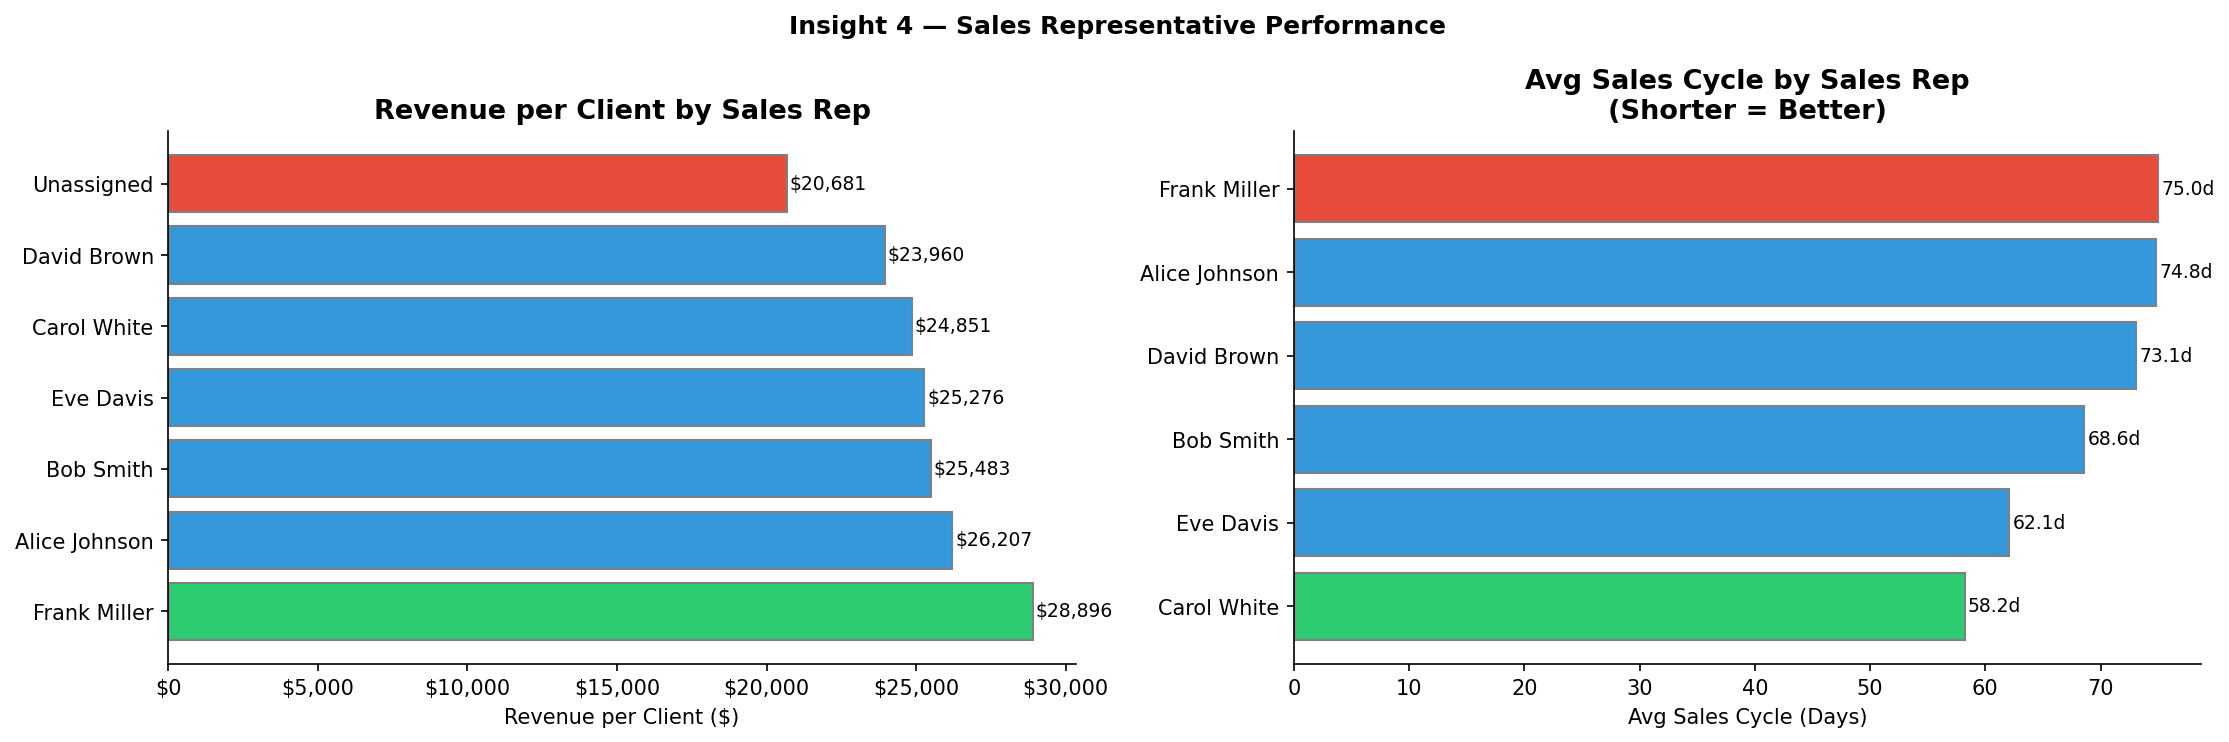

Insight 4 chart saved


In [6]:
# ─────────────────────────────────────────
# INSIGHT 4 — Sales Rep Performance Gap
# ─────────────────────────────────────────

rep_data = {
    'Sales_Rep'         : ['Frank Miller','Alice Johnson','Bob Smith',
                            'Eve Davis','Carol White','David Brown',
                            'Unassigned'],
    'Revenue_per_Client': [28896.16, 26206.55, 25483.26,
                            25276.17, 24851.20, 23960.04, 20681.33],
    'Converted'         : [35, 36, 37, 37, 35, 42, 50],
    'Avg_Cycle_Days'    : [75.0, 74.8, 68.6, 62.1, 58.2, 73.1, None]
}
rep_df = pd.DataFrame(rep_data)

print("=" * 60)
print("  INSIGHT 4: FRANK MILLER LEADS REVENUE BUT CAROL WHITE")
print("             CLOSES DEALS FASTEST")
print("=" * 60)
print(f"""
  Revenue per Client:
    Top    : Frank Miller   → $28,896.16 per client
    Bottom : Unassigned     → $20,681.33 per client
    Gap    : ${28896.16 - 20681.33:,.2f} difference

  Sales Cycle Speed:
    Fastest : Carol White   → 58.2 days avg
    Slowest : Frank Miller  → 75.0 days avg
    Gap     : 16.8 days difference

  Key Tension:
  Frank Miller generates the highest revenue per client
  but takes the longest to close deals (75 days).
  Carol White closes fastest (58.2 days) but generates
  lower revenue per client ($24,851.20).

  50 leads are "Unassigned" — generating the lowest
  revenue per client at $20,681.33. Assigning these
  leads to top reps could recover significant revenue.

  Estimated recovery if Unassigned leads went to
  Frank Miller's rate:
  → Additional revenue: ${(28896.16 - 20681.33) * 50:,.2f}
""")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Insight 4 — Sales Representative Performance',
             fontweight='bold')

colors_rep = ['#2ecc71' if r == 'Frank Miller'
               else '#e74c3c' if r == 'Unassigned'
               else '#3498db' for r in rep_df['Sales_Rep']]

# Revenue per client
axes[0].barh(rep_df['Sales_Rep'],
             rep_df['Revenue_per_Client'],
             color=colors_rep, edgecolor='gray')
axes[0].set_xlabel('Revenue per Client ($)')
axes[0].set_title('Revenue per Client by Sales Rep')
axes[0].xaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
for i, v in enumerate(rep_df['Revenue_per_Client']):
    axes[0].text(v + 100, i, f'${v:,.0f}', va='center', fontsize=9)

# Sales cycle (exclude Unassigned)
cycle_df = rep_df[rep_df['Sales_Rep'] != 'Unassigned'].copy()
cycle_df = cycle_df.sort_values('Avg_Cycle_Days')
colors_c  = ['#2ecc71' if r == 'Carol White'
              else '#e74c3c' if r == 'Frank Miller'
              else '#3498db' for r in cycle_df['Sales_Rep']]
axes[1].barh(cycle_df['Sales_Rep'],
             cycle_df['Avg_Cycle_Days'],
             color=colors_c, edgecolor='gray')
axes[1].set_xlabel('Avg Sales Cycle (Days)')
axes[1].set_title('Avg Sales Cycle by Sales Rep\n(Shorter = Better)')
for i, v in enumerate(cycle_df['Avg_Cycle_Days']):
    axes[1].text(v + 0.3, i, f'{v:.1f}d', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/Insight4_Sales_Rep_Performance.png',
            bbox_inches='tight')
plt.show()
print("Insight 4 chart saved")

  INSIGHT 5: REVENUE IS HIGHLY VOLATILE — KEY RISK

  Best Month  : May-23  → $580,354.73
  Worst Month : Jan-24 → $179,299.85
  Difference  : $401,054.88 (223.7% swing)

  Avg Monthly Lead Growth Rate    : 3.63%
  Avg Monthly Revenue Growth Rate : 8.83%

  Most Volatile Months:
  → Aug-23: +107.85% revenue spike  (outlier month)
  → Feb-24: +140.08% revenue spike  (biggest single jump)
  → Jul-23: -54.45%  revenue drop   (sharpest decline)
  → Jun-24: -58.65%  revenue drop   (concerning end to data)

  Key Finding:
  Revenue swings of 50–140% between months indicate
  an inconsistent sales pipeline. The business lacks
  a predictable, stable revenue stream — making
  forecasting and planning very difficult.

  Recommendation:
  Implement a minimum monthly lead quota per sales rep
  and establish a pipeline review process to smooth
  out these extreme fluctuations.



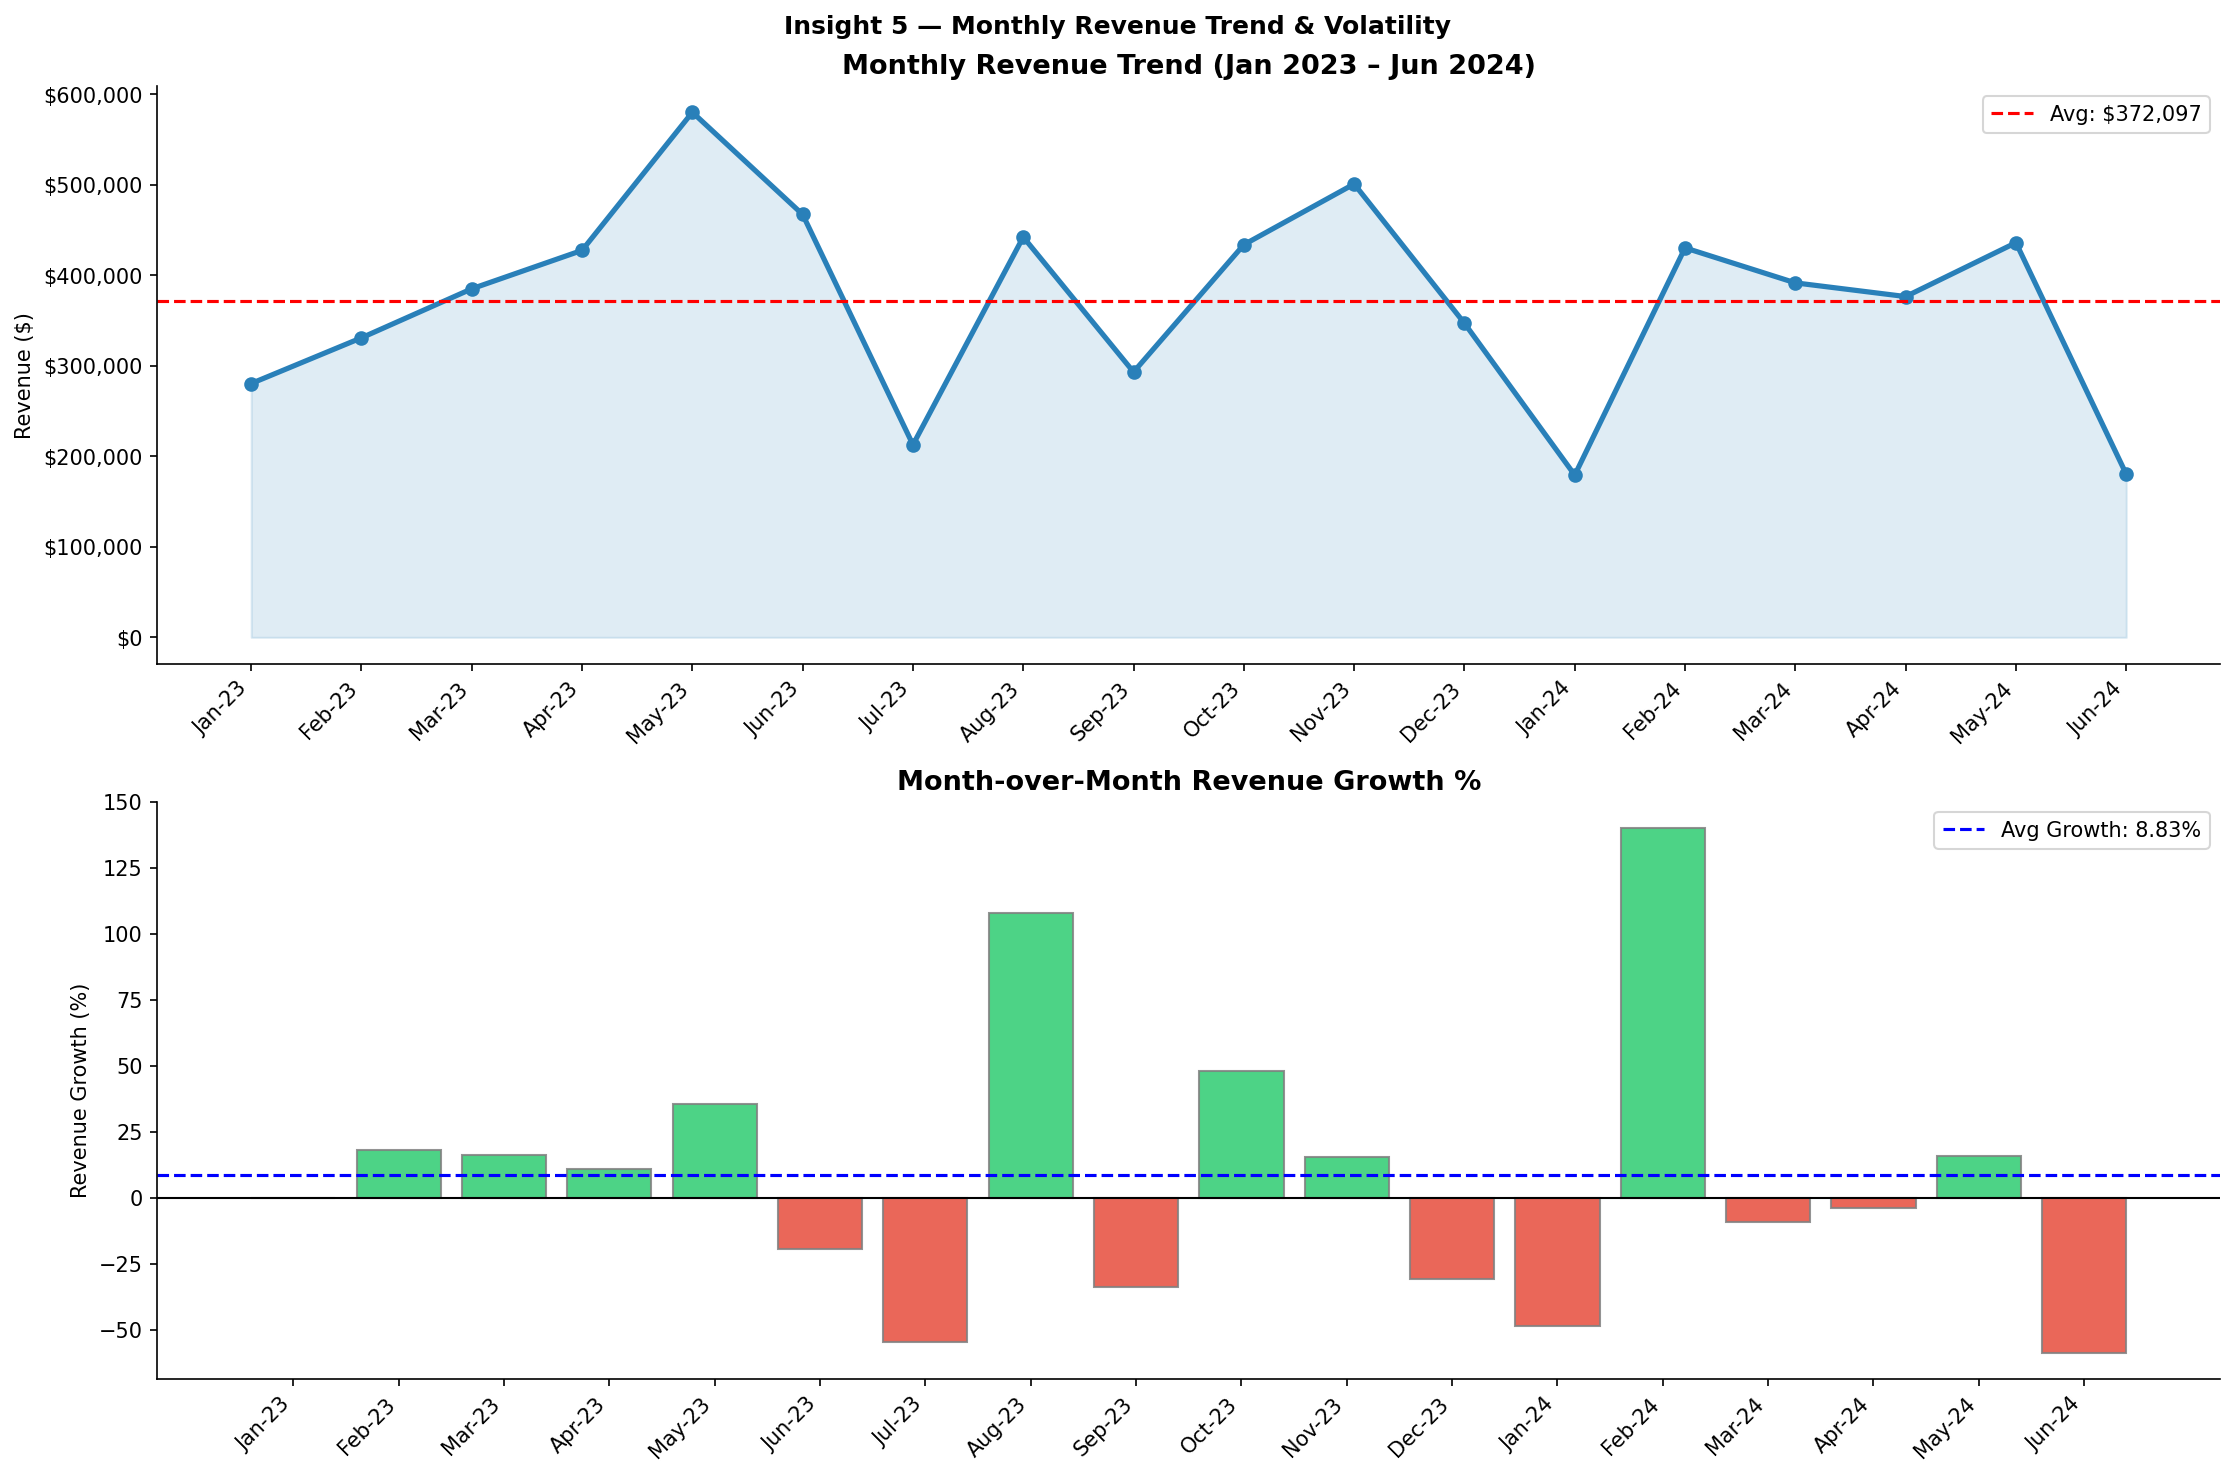

Insight 5 chart saved


In [7]:
# ─────────────────────────────────────────
# INSIGHT 5 — Revenue Is Volatile Month-to-Month
# ─────────────────────────────────────────

monthly_data = {
    'Month'     : ['Jan-23','Feb-23','Mar-23','Apr-23','May-23',
                   'Jun-23','Jul-23','Aug-23','Sep-23','Oct-23',
                   'Nov-23','Dec-23','Jan-24','Feb-24','Mar-24',
                   'Apr-24','May-24','Jun-24'],
    'Revenue'   : [280539.46,331047.82,385229.11,427704.75,580354.73,
                   467363.71,212870.60,442449.26,293248.04,433988.10,
                   501092.96,347128.32,179299.85,430461.98,391780.97,
                   376643.70,436180.59,180357.25],
    'Leads'     : [26,44,40,36,43,39,36,51,32,48,
                   39,34,31,37,39,35,39,27],
    'Rev_Growth': [None,18.00,16.37,11.03,35.69,-19.47,-54.45,
                   107.85,-33.72,47.99,15.46,-30.73,-48.35,
                   140.08,-8.99,-3.86,15.81,-58.65]
}
m_df = pd.DataFrame(monthly_data)

best_month  = m_df.loc[m_df['Revenue'].idxmax(), 'Month']
worst_month = m_df.loc[m_df['Revenue'].idxmin(), 'Month']
best_rev    = m_df['Revenue'].max()
worst_rev   = m_df['Revenue'].min()

print("=" * 60)
print("  INSIGHT 5: REVENUE IS HIGHLY VOLATILE — KEY RISK")
print("=" * 60)
print(f"""
  Best Month  : {best_month}  → ${best_rev:,.2f}
  Worst Month : {worst_month} → ${worst_rev:,.2f}
  Difference  : ${best_rev - worst_rev:,.2f} ({((best_rev-worst_rev)/worst_rev*100):.1f}% swing)

  Avg Monthly Lead Growth Rate    : 3.63%
  Avg Monthly Revenue Growth Rate : 8.83%

  Most Volatile Months:
  → Aug-23: +107.85% revenue spike  (outlier month)
  → Feb-24: +140.08% revenue spike  (biggest single jump)
  → Jul-23: -54.45%  revenue drop   (sharpest decline)
  → Jun-24: -58.65%  revenue drop   (concerning end to data)

  Key Finding:
  Revenue swings of 50–140% between months indicate
  an inconsistent sales pipeline. The business lacks
  a predictable, stable revenue stream — making
  forecasting and planning very difficult.

  Recommendation:
  Implement a minimum monthly lead quota per sales rep
  and establish a pipeline review process to smooth
  out these extreme fluctuations.
""")

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('Insight 5 — Monthly Revenue Trend & Volatility',
             fontweight='bold')

x = range(len(m_df))

# Chart 1: Revenue trend
axes[0].plot(x, m_df['Revenue'], marker='o', color='#2980b9',
             linewidth=2.5, markersize=6)
axes[0].fill_between(x, m_df['Revenue'], alpha=0.15, color='#2980b9')
axes[0].axhline(y=m_df['Revenue'].mean(), color='red', linestyle='--',
                linewidth=1.5,
                label=f"Avg: ${m_df['Revenue'].mean():,.0f}")
axes[0].set_xticks(x)
axes[0].set_xticklabels(m_df['Month'], rotation=45, ha='right')
axes[0].set_ylabel('Revenue ($)')
axes[0].set_title('Monthly Revenue Trend (Jan 2023 – Jun 2024)')
axes[0].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda v, _: f'${v:,.0f}'))
axes[0].legend()

# Chart 2: Growth rate bars
growth_vals = m_df['Rev_Growth'].fillna(0)
bar_colors  = ['#2ecc71' if v >= 0 else '#e74c3c'
                for v in growth_vals]
axes[1].bar(x, growth_vals, color=bar_colors, edgecolor='gray', alpha=0.85)
axes[1].axhline(y=0, color='black', linewidth=1)
axes[1].axhline(y=8.83, color='blue', linestyle='--',
                linewidth=1.5, label='Avg Growth: 8.83%')
axes[1].set_xticks(x)
axes[1].set_xticklabels(m_df['Month'], rotation=45, ha='right')
axes[1].set_ylabel('Revenue Growth (%)')
axes[1].set_title('Month-over-Month Revenue Growth %')
axes[1].legend()

plt.tight_layout()
plt.savefig('../reports/Insight5_Revenue_Trend.png', bbox_inches='tight')
plt.show()
print("Insight 5 chart saved")

  INSIGHT 6: FASTEST CYCLE ≠ BEST CONVERSION — KEY TRADEOFF

  Sales Cycle by Source:
    Fastest : Email Campaign → 57.8 days
    Slowest : Website        → 78.1 days
    Overall Avg              → 67.7 days

  Paradox Found:
  Email Campaign closes the FASTEST (57.8 days) but
  has one of the LOWEST conversion rates (33.12%).

  Website takes the LONGEST (78.1 days) but has the
  HIGHEST conversion rate (47.96%) and ROI (341%).

  This means:
  → Website leads take more time but are higher quality
  → Email Campaign leads move fast but many drop off
  → Speed does not equal quality in this pipeline

  Recommendation:
  Do not optimize purely for speed. Focus on lead
  quality scoring — especially for Website leads where
  the longer nurture period clearly pays off.



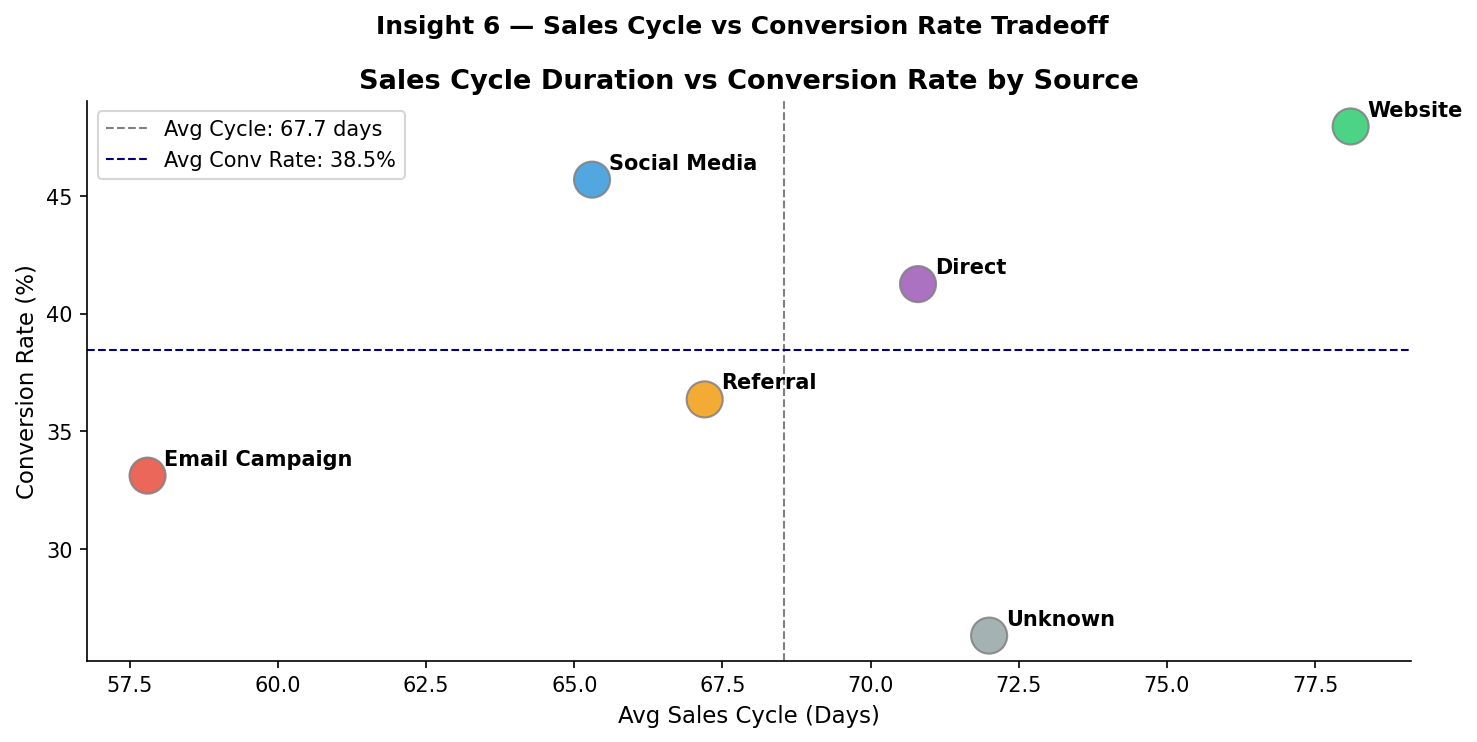

Insight 6 chart saved


In [8]:
# ─────────────────────────────────────────
# INSIGHT 6 — Email Campaign Has Fastest Cycle
# ─────────────────────────────────────────

cycle_data = {
    'Source'         : ['Email Campaign','Social Media','Direct',
                        'Referral','Unknown','Website'],
    'Avg_Cycle_Days' : [57.8, 65.3, 70.8, 67.2, 72.0, 78.1],
    'Conv_Rate'      : [33.12, 45.70, 41.26, 36.36, 26.32, 47.96]
}
cycle_df = pd.DataFrame(cycle_data)

print("=" * 60)
print("  INSIGHT 6: FASTEST CYCLE ≠ BEST CONVERSION — KEY TRADEOFF")
print("=" * 60)
print(f"""
  Sales Cycle by Source:
    Fastest : Email Campaign → 57.8 days
    Slowest : Website        → 78.1 days
    Overall Avg              → 67.7 days

  Paradox Found:
  Email Campaign closes the FASTEST (57.8 days) but
  has one of the LOWEST conversion rates (33.12%).

  Website takes the LONGEST (78.1 days) but has the
  HIGHEST conversion rate (47.96%) and ROI (341%).

  This means:
  → Website leads take more time but are higher quality
  → Email Campaign leads move fast but many drop off
  → Speed does not equal quality in this pipeline

  Recommendation:
  Do not optimize purely for speed. Focus on lead
  quality scoring — especially for Website leads where
  the longer nurture period clearly pays off.
""")

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Insight 6 — Sales Cycle vs Conversion Rate Tradeoff',
             fontweight='bold')

scatter = ax.scatter(cycle_df['Avg_Cycle_Days'],
                     cycle_df['Conv_Rate'],
                     s=300,
                     c=['#e74c3c','#3498db','#9b59b6',
                        '#f39c12','#95a5a6','#2ecc71'],
                     alpha=0.85, edgecolors='gray', zorder=5)

for _, row in cycle_df.iterrows():
    ax.annotate(row['Source'],
                (row['Avg_Cycle_Days'], row['Conv_Rate']),
                textcoords='offset points',
                xytext=(8, 5), fontsize=10, fontweight='bold')

ax.axvline(x=cycle_df['Avg_Cycle_Days'].mean(), color='gray',
           linestyle='--', linewidth=1, label='Avg Cycle: 67.7 days')
ax.axhline(y=cycle_df['Conv_Rate'].mean(), color='navy',
           linestyle='--', linewidth=1,
           label=f"Avg Conv Rate: {cycle_df['Conv_Rate'].mean():.1f}%")

ax.set_xlabel('Avg Sales Cycle (Days)', fontsize=11)
ax.set_ylabel('Conversion Rate (%)', fontsize=11)
ax.set_title('Sales Cycle Duration vs Conversion Rate by Source')
ax.legend()

plt.tight_layout()
plt.savefig('../reports/Insight6_Cycle_vs_Conversion.png',
            bbox_inches='tight')
plt.show()
print("Insight 6 chart saved")

  INSIGHT 7: NORTH IS BEST REGION, EAST NEEDS ATTENTION

  North Region:
    Conversion Rate : 44.32%   (highest)
    CAC             : $5,576.93 (lowest — most efficient)
    Converted Leads : 82        (most conversions)
    Est. Revenue    : $2,032,840.68

  East Region:
    Conversion Rate : 34.97%   (lowest among known regions)
    CAC             : $7,569.70 (highest — least efficient)
    Converted Leads : 57
    Est. Revenue    : $1,413,072.18

  North vs East Gap:
    Conversion Rate Gap : 9.35 percentage points
    CAC Gap             : $1,992.77 extra cost per customer
    Revenue Gap         : $619,768.50

  Key Finding:
  North region consistently outperforms East across
  every KPI. If East matched North's conversion rate,
  it would generate ~15 additional conversions worth
  an estimated $371,861.10 in extra revenue.

  Recommendation:
  Conduct a root cause analysis on East region.
  Share North region's sales strategies, lead
  qualification methods, and rep training 

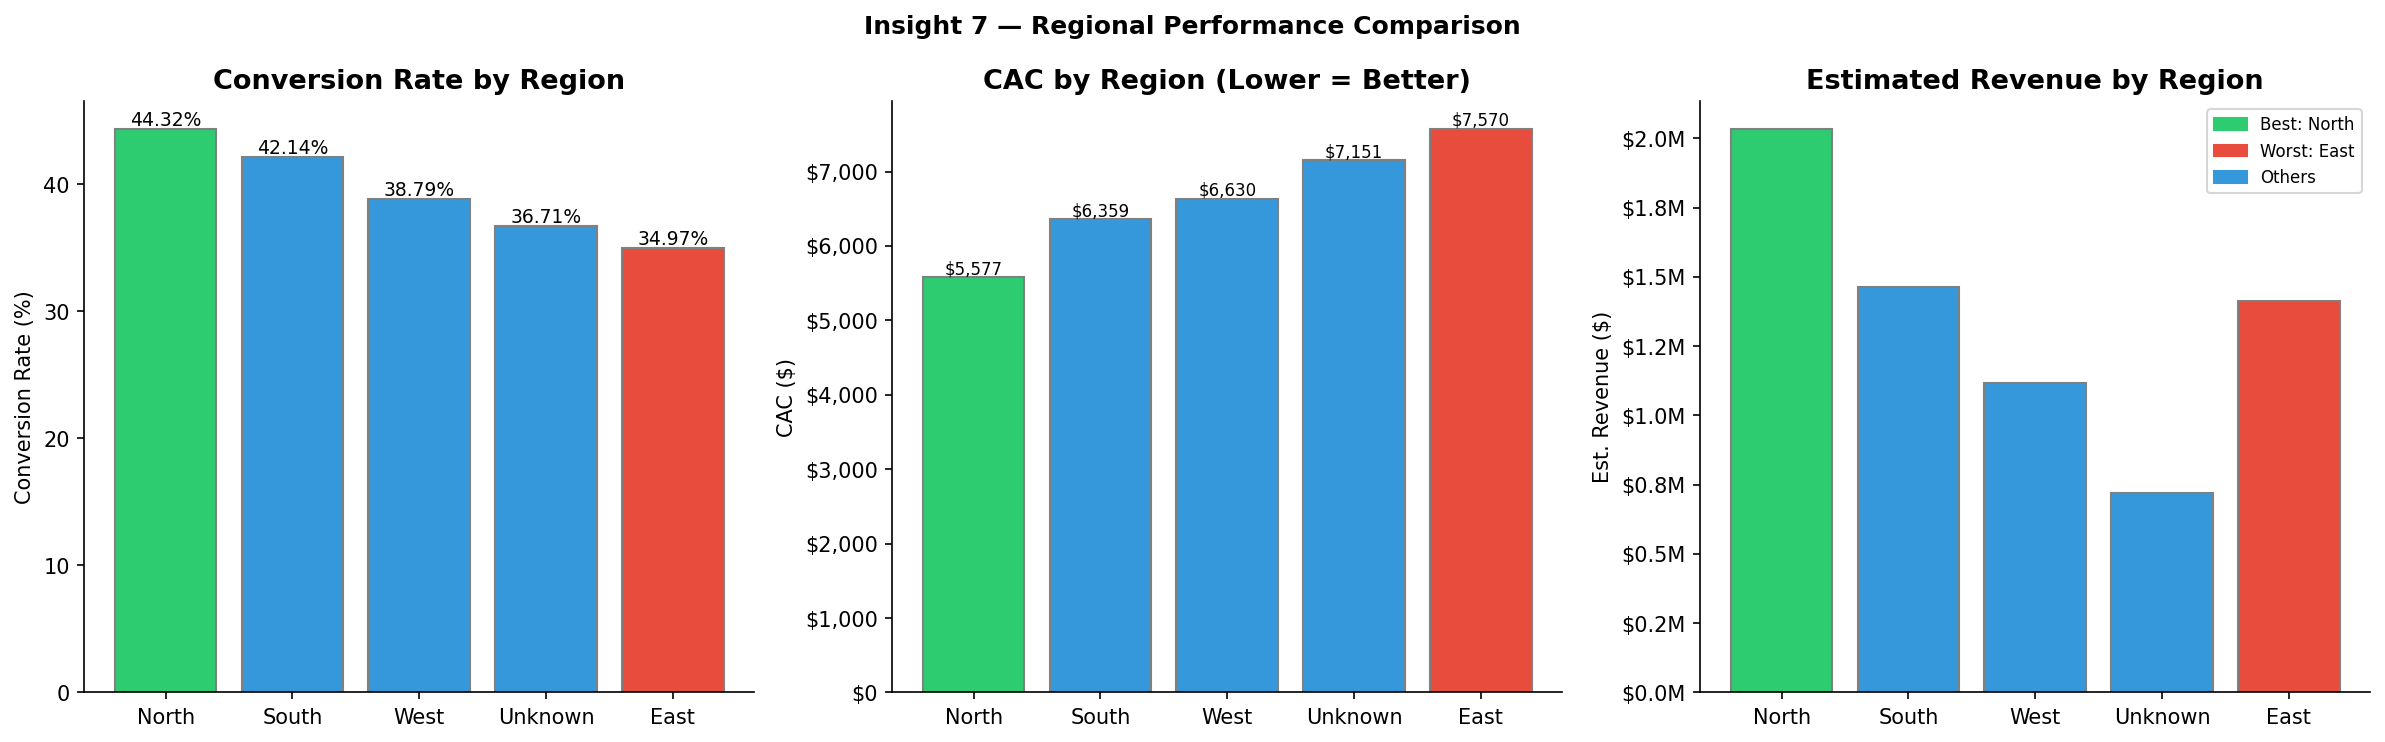

Insight 7 chart saved


In [9]:
# ─────────────────────────────────────────
# INSIGHT 7 — NORTH REGION IS THE STAR PERFORMER
# ─────────────────────────────────────────

region_data = {
    'Region'      : ['North','South','West','Unknown','East'],
    'Total_Leads' : [185, 140, 116, 79, 163],
    'Converted'   : [82, 59, 45, 29, 57],
    'Conv_Rate'   : [44.32, 42.14, 38.79, 36.71, 34.97],
    'CAC'         : [5576.93, 6358.75, 6630.35, 7150.54, 7569.70]
}
reg_df = pd.DataFrame(region_data)

reg_df['Revenue'] = reg_df['Converted'] * 24790.74

print("=" * 60)
print("  INSIGHT 7: NORTH IS BEST REGION, EAST NEEDS ATTENTION")
print("=" * 60)
print(f"""
  North Region:
    Conversion Rate : 44.32%   (highest)
    CAC             : $5,576.93 (lowest — most efficient)
    Converted Leads : 82        (most conversions)
    Est. Revenue    : ${82 * 24790.74:,.2f}

  East Region:
    Conversion Rate : 34.97%   (lowest among known regions)
    CAC             : $7,569.70 (highest — least efficient)
    Converted Leads : 57
    Est. Revenue    : ${57 * 24790.74:,.2f}

  North vs East Gap:
    Conversion Rate Gap : 9.35 percentage points
    CAC Gap             : $1,992.77 extra cost per customer
    Revenue Gap         : ${(82 - 57) * 24790.74:,.2f}

  Key Finding:
  North region consistently outperforms East across
  every KPI. If East matched North's conversion rate,
  it would generate ~15 additional conversions worth
  an estimated ${15 * 24790.74:,.2f} in extra revenue.

  Recommendation:
  Conduct a root cause analysis on East region.
  Share North region's sales strategies, lead
  qualification methods, and rep training across
  all underperforming regions.
""")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Insight 7 — Regional Performance Comparison',
             fontweight='bold')

reg_colors = ['#2ecc71' if r == 'North'
               else '#e74c3c' if r == 'East'
               else '#3498db' for r in reg_df['Region']]

# Conversion rate
axes[0].bar(reg_df['Region'], reg_df['Conv_Rate'],
            color=reg_colors, edgecolor='gray')
axes[0].set_ylabel('Conversion Rate (%)')
axes[0].set_title('Conversion Rate by Region')
for i, v in enumerate(reg_df['Conv_Rate']):
    axes[0].text(i, v + 0.3, f'{v}%', ha='center', fontsize=9)

# CAC
axes[1].bar(reg_df['Region'], reg_df['CAC'],
            color=reg_colors, edgecolor='gray')
axes[1].set_ylabel('CAC ($)')
axes[1].set_title('CAC by Region (Lower = Better)')
axes[1].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))
for i, v in enumerate(reg_df['CAC']):
    axes[1].text(i, v + 50, f'${v:,.0f}', ha='center', fontsize=8)

# Estimated revenue
axes[2].bar(reg_df['Region'], reg_df['Revenue'],
            color=reg_colors, edgecolor='gray')
axes[2].set_ylabel('Est. Revenue ($)')
axes[2].set_title('Estimated Revenue by Region')
axes[2].yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))

green_p = mpatches.Patch(color='#2ecc71', label='Best: North')
red_p   = mpatches.Patch(color='#e74c3c', label='Worst: East')
blue_p  = mpatches.Patch(color='#3498db', label='Others')
axes[2].legend(handles=[green_p, red_p, blue_p], fontsize=8)

plt.tight_layout()
plt.savefig('../reports/Insight7_Regional_Performance.png',
            bbox_inches='tight')
plt.show()
print("Insight 7 chart saved")

In [ ]:
# ─────────────────────────────────────────
# CELFINAL RECOMMENDATIONS SUMMARY
# ─────────────────────────────────────────

print("""
╔══════════════════════════════════════════════════════════════╗
║         FINAL RECOMMENDATIONS SUMMARY                       ║
╠══════════════════════════════════════════════════════════════╣
║                                                              ║
║  1. BOOST CONVERSION RATE                                    ║
║     Current 39.82% is below 45-55% industry benchmark.      ║
║     Implement lead scoring to prioritize high-quality        ║
║     leads. Target: reach 45% within 2 quarters.             ║
║                                                              ║
║  2. REALLOCATE MARKETING BUDGET                              ║
║     Shift 20-30% of Email Campaign budget to Website         ║
║     and Social Media which deliver higher ROI (341%).        ║
║                                                              ║
║  3. REDUCE CAC IN EAST REGION                                ║
║     East CAC ($7,569) is 35.7% higher than North            ║
║     ($5,576). Apply North region strategies to East.         ║
║                                                              ║
║  4. ASSIGN ALL UNASSIGNED LEADS                              ║
║     50 unassigned leads generate lowest revenue per          ║
║     client ($20,681 vs $28,896 for top rep). Assigning       ║
║     them could recover $410,637 in additional revenue.       ║
║                                                              ║
║  5. STABILIZE MONTHLY REVENUE PIPELINE                       ║
║     Revenue swings of 50-140% MoM are unsustainable.         ║
║     Set monthly quotas and implement pipeline reviews.       ║
║                                                              ║
║  6. LEVERAGE CAROL WHITE'S SPEED + FRANK MILLER'S VALUE      ║
║     Create a blended training program combining Carol's      ║
║     fast closing (58.2 days) with Frank's high revenue       ║
║     per client ($28,896) strategy.                           ║
║                                                              ║
║  7. INVEST MORE IN WEBSITE LEAD GENERATION                   ║
║     Website has best conversion (47.96%), lowest CAC         ║
║     ($5,438) and highest ROI (341%) despite fewest           ║
║     leads (98). Scaling this channel is high priority.       ║
║                                                              ║
╚══════════════════════════════════════════════════════════════╝
""")